Objetivos del taller:
*** Mejorar estrategía de ocupación y se basa en 3 frentes:
Una vez que un cliente realiza una reserva, entender los factores que determinan la duración de la
estadía, la probabilidad de cancelación y la influencia de características como el tipo de
hotel, la composición del grupo de huéspedes o el canal de reservación es vital para el
éxito del negocio ***
  
El dataset suministrado contiene alrededor de 32 columnas y 58895 filas. Contiene información relacionada al servicio de hospedaje ofrecido por un hotel o un resort. Asimismo, contiene informacion del estado y fecha de la reserva, el pais, las personas que se alojaron, el tipo de plan escogido por el usuario, la compañia encargada del pago o de realizar la reserva, si la reserva fue cancelada, entre otros.
Los tipos de datos encontrados en el dataset son: text, boolean, integer, numeric y date.
A continuación se presenta el top 5 atributos elegidos:
* hotel                   (Cualitativa nominal):,
* reservation_status      (Cualitativa nominal),
* deposit_type            (Cualitativa nominal),
* is_Canceled             (Cualitativa nominal),
* lead_time               (cuantitativa discreta)




## Carga y limpieza de datos

In [3]:
# Importación de librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
reservation_df = pd.read_csv("data/hotel_bookings_modified.csv")

C:\Users\Diego\AppData\Local\Temp\ipykernel_19780\34777500.py:1: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  reservation_df = pd.read_csv("data/hotel_bookings_modified.csv")


In [ ]:
#reservation_df.sample(3)
#reservation_df.dtypes
# Showing dataframe dimensions
reservation_df.shape

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,kids
29173,Resort Hotel,0,386,2016.0,October,43,20,0,3,2,...,NaN,NaN,0.0,Transient-Party,60.0,0.0,1.0,Check-Out,2016-10-23,NaN
48914,City Hotel,1,66,20016.0,April,14,2,1,1,1,...,9.0,NaN,0.0,Transient,88.2,0.0,0.0,Canceled,2016-02-21,NaN
7045,Resort Hotel,1,6,2016.0,July,30,18,1,0,1,...,NaN,53.0,0.0,Transient,126.0,0.0,0.0,Canceled,2016-07-14,NaN


In [6]:
# Lista de columnas a castear según lo indica el Diccionario de Datos
df_reservation_mod=reservation_df
cast_columns_int = ["arrival_date_year","children","days_in_waiting_list","required_car_parking_spaces","total_of_special_requests","agent","company"]
cast_columns_date = ["reservation_status_date"]


In [ ]:
# transformación columnas enteras
def convertir_string(cast_columns_int,df):
    for i in cast_columns_int:
        df[i]=(
        pd.to_numeric(df[i], errors="coerce")
          .round()
          .astype("Int64")
        )
# transformación columnas fecha
def convertir_date(cast_columns_date,df):
    for i in cast_columns_date:
        df[i]=(
        pd.to_datetime(df[i], errors="coerce")
        )

# limpieza columnas tipo "object" 
def eliminar_espacios(columns_object,df):
    df[columns_object]=df[columns_object].apply(lambda x: x.str.strip())


convertir_string(cast_columns_int,df_reservation_mod)
convertir_date(cast_columns_date,df_reservation_mod)
#obtiene lista de columnas tipo "object"
columns_object = df_reservation_mod.select_dtypes(include="object").columns
eliminar_espacios(columns_object,df_reservation_mod)

In [55]:
#se eliminan duplicados
df_reservation_mod = df_reservation_mod.drop_duplicates()

## Univariable Cualitative Analysis

#### Variable hotel

In [ ]:
# obtencion de valores unicos, el valor mas repetido y su frecuencia
reservation_df["hotel"].describe()

count            58895
unique               2
top       Resort Hotel
freq             40063
Name: hotel, dtype: object

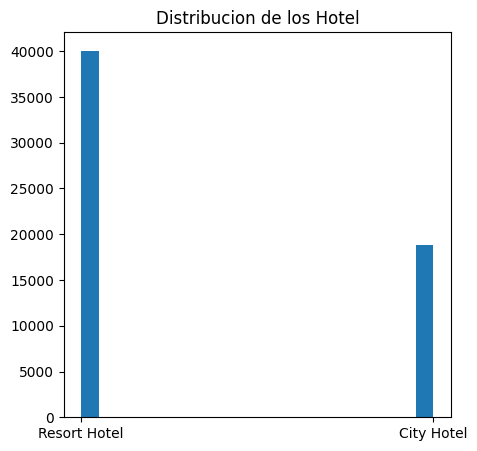

In [56]:
# Calculating the relative frecuency of accommodations offered
reservation_df["hotel"].value_counts(dropna=False, normalize=True)

# Plotting a histogram for price
plt.figure(figsize=(5, 5))                     
plt.hist(reservation_df["hotel"], bins=20)      
plt.title("Distribucion de los Hotel")
plt.show()

El 68% de las reservas se realizan en el Resort Hotel, lo que lleva a pensar que para el cliente es mas atractivo esta clase de hospedaje porque además de ofrecer hospedaje, ofrece actividades de recreación , descanso y gastronomía. El resto de las reservas (32%), se hacen en el city hotel.

#### Variable reservation_status

Cerca del 58% de las reservas son tomadas exitosamente. Hay un 39% de reservas que son canceladas, por lo que es importante analizar que factores conducieron a la cancelación por parte del cliente y que oportunidades de mejora se pueden aplicar en la estrategia de alojamiento del cliente. Finalmente, cerca del 1% de alojamientos no se hizo el check-in y el cliente informo el motivo. Se se tuviera la información relacionada al motivo, se podría analizar si esos motivos relacionan al servicio de hospedaje, pero como no se tiene, se plantea como un futuro análisis.

In [37]:
# obtain unique values, count, most repeat value
reservation_df["reservation_status"].describe()
# Calculating the relative frecuency of accommodations offered
reservation_df["reservation_status"].value_counts(dropna=False, normalize=True)

reservation_status
Check-Out    0.582240
Canceled     0.394227
No-Show      0.013533
NaN          0.010001
Name: proportion, dtype: float64

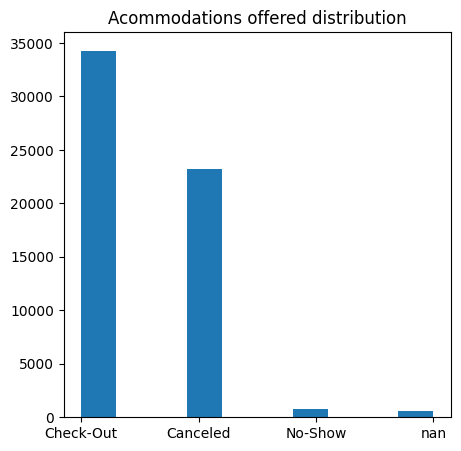

In [38]:


# Plotting a histogram for price
plt.figure(figsize=(5, 5))                     
plt.hist(reservation_df["reservation_status"].astype(str), bins=10)      
plt.title("Acommodations offered distribution")
plt.show()


#### Variable deposit_type

In [44]:
# obtain unique values, count, most repeat value
reservation_df["deposit_type"].describe()

count          58895
unique             4
top       No Deposit
freq           52333
Name: deposit_type, dtype: object

In [57]:
# Calculating the relative frecuency of accommodations offered
reservation_df["deposit_type"].value_counts(dropna=False, normalize=True)

deposit_type
No Deposit    0.888581
Non Refund    0.108991
Refundable    0.002428
Name: proportion, dtype: float64

Se observa que en la columna "deposit_type" existe un problema de calidad de datos basado en columna relacionado a la existencia de sinónimo (Non Refund = No Refund). Se procede a solucionarlo y calcular nuevamente el conteo de valores dentro de la columna

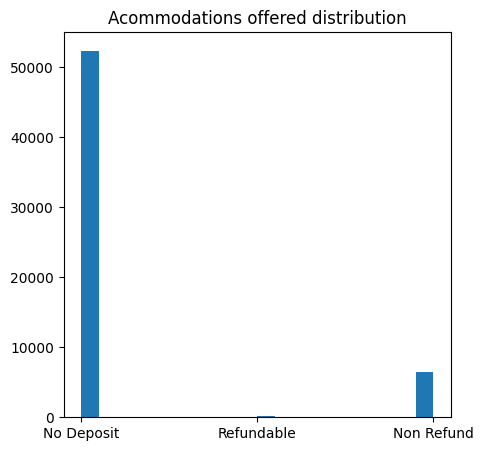

In [60]:
# Calculating the relative frecuency of accommodations offered
reservation_df["deposit_type"].replace("No Refund","Non Refund",inplace=True)
reservation_df["deposit_type"].value_counts(dropna=False, normalize=True)

# Plotting a histogram for price
plt.figure(figsize=(5, 5))                     
plt.hist(reservation_df["deposit_type"], bins=20)      
plt.title("Acommodations offered distribution")
plt.show()

Cerca del 88% de los clientes no hacen un depositivo para realizar una reserva. El 10% de los clientes hacen el depositivo del 100%, pero no se devuelve si cancela. Y muy pocos clientes hacen un depositivo por un valor por debajo del costo de la reserva.

### Variable is_canceled

In [62]:
# obtain unique values, count, most repeat value
reservation_df["is_canceled"].describe()

count    58895.000000
mean         0.411393
std          0.492090
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: is_canceled, dtype: float64

In [65]:
# Calculating the relative frecuency of accommodations offered
reservation_df["is_canceled"].value_counts(dropna=False, normalize=True)

is_canceled
0    0.588607
1    0.411393
Name: proportion, dtype: float64

Cerca del 58% de las reservas no fueron canceladas. En cambio, cerca del 42% de las reservas fueron canceladas. Esta valor tan alto de cancelación indica que hay una opción de mejora notoría en la estrategia de ocupación.

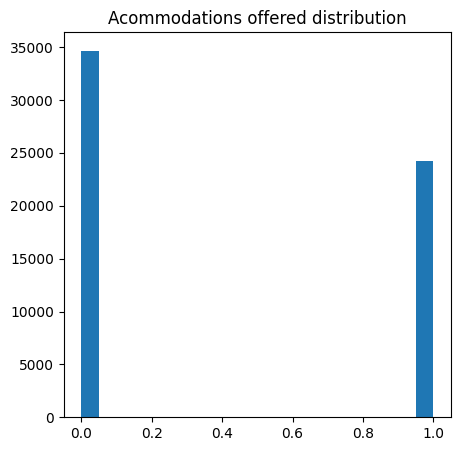

In [66]:
# Plotting a histogram for price
plt.figure(figsize=(5, 5))                     
plt.hist(reservation_df["is_canceled"], bins=20)      
plt.title("Acommodations offered distribution")
plt.show()

## Univariable Cuantitative Analysis

#### Variable lead_time

In [67]:
# obtain unique mean, std, cuantiles,max value
reservation_df["lead_time"].describe()

count    58895.000000
mean       100.050904
std        101.162420
min          0.000000
25%         17.000000
50%         69.000000
75%        157.000000
max        737.000000
Name: lead_time, dtype: float64

Mean = 100 → en promedio los alojamientos se reservan con 100 dias de anticipación (mas de 3 meses de anticipación)
- Q1 (25%) = 17          → El 25% de los alojamientos se reservan con 17 dias de antelación
- Q2 (50%, mediana) = 69 → El 50% de los alojamientos se reservan con 69 dias de antelación
- Q3 (75%) = 157         → El 75% de los alojamientos se reservan con 157 dias de antelación o menos

📌 Rango intercuartílico (IQR):
- IQR= Q3 - Q1 = 140
- Límite inferior = Q1 - 1.5 × IQR = 17- 1.5*140  = 0    
- Límite superior = Q3 + 1.5 × IQR = 157+1.5*140  = 367

👉 Entonces, alojamientos que son reservados con una antelacion ≥ 367 dias, se consideran valores atipicos

[]

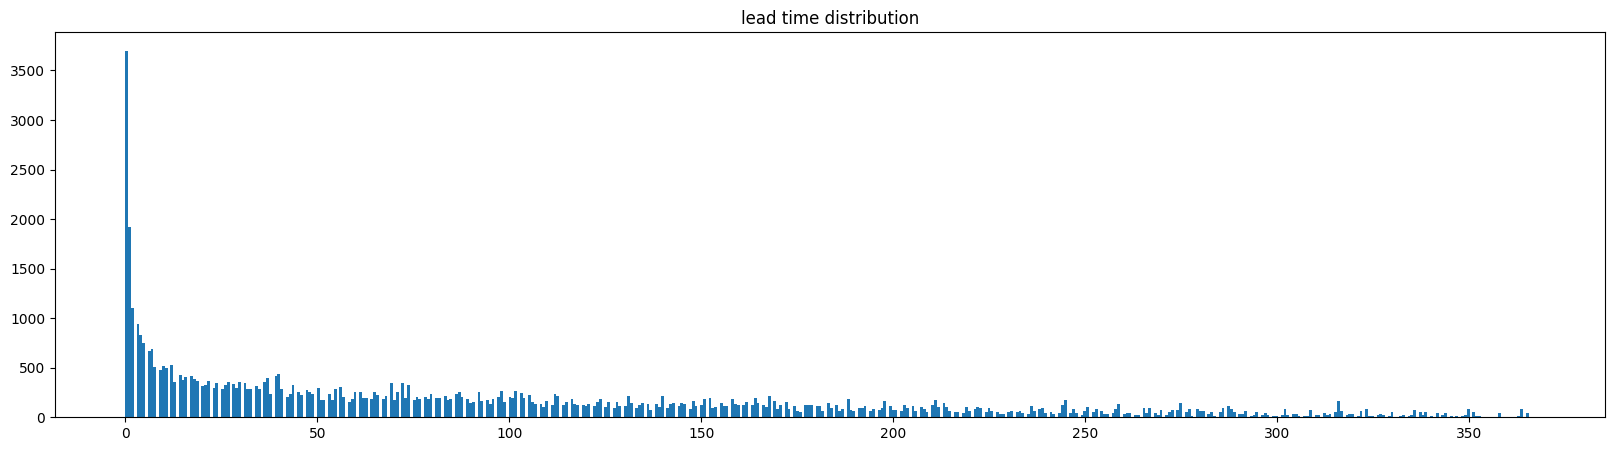

In [82]:

# Calculating the relative frecuency of lead times
q1=reservation_df["lead_time"].quantile(0.25)
q3=reservation_df["lead_time"].quantile(0.75)
iqr=q3-q1
plt.figure(figsize=(20, 5))
plt.hist(reservation_df.loc[reservation_df["lead_time"] <= (q3 + 1.5 * iqr)]["lead_time"], bins=500)
plt.title("lead time distribution")
plt.plot()


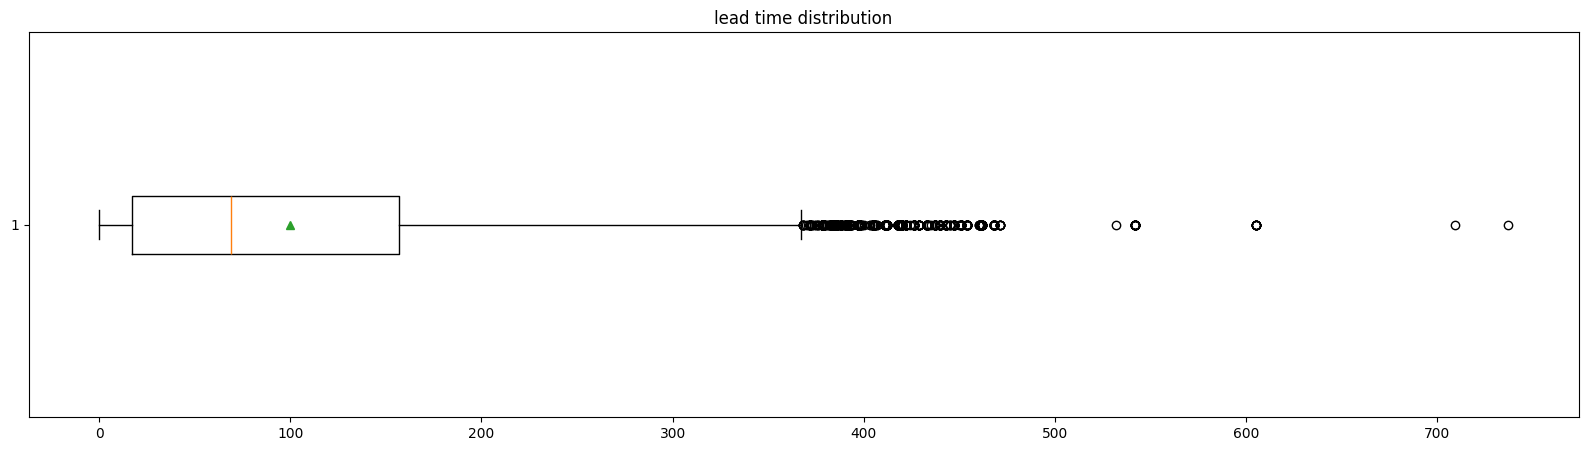

In [75]:

# Plotting a boxplot for number of reviews
plt.figure(figsize=(20, 5))
plt.boxplot(reservation_df["lead_time"], showmeans=True, vert=False)
plt.title("lead time distribution")
plt.show()

La media (triangulo verde) que es 100 esta no tan cerca de la mediana que es 69 dias (linea naranja ), por lo que existe una ligera asimetría positiva en la distribución, causada por la presencia de valores atípicos positivos grandes que están empujando la media hacia la derecha . Asimismo, los valores atipicos empiezan por encima de los 367 dias y se extienden hasta valores muy grandes ( 700 dias). La mayoria de los dias de antelacion de reserva (rango intercuartilico  Q3 - Q1), están entre 17 y 160 dias, lo que representa el comportamiento típico de los clientes.

In [ ]:
# Asimetría
skewness = reservation_df["lead_time"].skew()
# Curtosis
kurtosis = reservation_df["lead_time"].kurt()
print("Asimetría (skewness):", skewness)
print("Curtosis:", kurtosis)

Asimetría (skewness): 1.2082573004591315
Curtosis: 1.0087856167757177


Como la asimetria arroja un valor positivo mayor a 1, nos confirma que distribución esta sesgada hacia la derecha. Entonces, existen unos valores positivos muy grandes que estan arrastrando la media hacia la derecha.
También, como la curtosis es cercano a uno la variable está sesgada a la derecha y presenta una concentración central fuerte con algunos valores atípicos altos que le dan colas más pesadas.

## Analisis Ivan


Estrategia de análisis:

La estrategia inicia con la validación y limpieza de los datos de reservas para garantizar su calidad, eliminando valores duplicados, transformación de tipos de datos (entre otros). Posteriormente se realizará un análisis univariado para entender y describir las distribuciones de las variables seleccionadas, empleando medidas de tendencia central, dispersión y gráficos como histogramas y boxplots. Con lo anterior se busca identificar patrones generales y posibles valores atípicos. 

Luego se avanzará con un análisis bivariado para explorar relaciones entre variables, por ejemplo, la influencia del tipo de hotel, el canal de reservación sobre la probabilidad de cancelación. Se utilizará correlaciones y diagramas de dispersión enriquecidos con color por categorías. Finalmente se propondrán visualizaciones que permitan identificar segmentos de clientes y estrategias de precios que contribuyan a reducir cancelaciones y mejorar la ocupación otelera. 

In [15]:
reservation_df.head(3)
reservation_df["arrival_date_year"].unique()
df_reservation_mod = reservation_df

Se identifican 13.340 valores nulos (valores iguales en todas sus columnas, en el dataset no hay una llave por la cual agrupar).

In [16]:
df_reservation_mod.duplicated().sum()
dups_all = df_reservation_mod[df_reservation_mod.duplicated(keep=False)].sort_values(list(df_reservation_mod.columns))
dups_all.head(4)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,kids
40772,City Hotel,0,0,2015,August,32,7,0,2,2,...,14,<NA>,0,Transient,75.0,0,1,Check-Out,2015-08-09,NaN
40802,City Hotel,0,0,2015,August,32,7,0,2,2,...,14,<NA>,0,Transient,75.0,0,1,Check-Out,2015-08-09,NaN
40821,City Hotel,0,0,2015,August,32,8,0,1,2,...,9,<NA>,0,Transient,89.0,0,1,Check-Out,2015-08-09,NaN
40838,City Hotel,0,0,2015,August,32,8,0,1,2,...,9,<NA>,0,Transient,89.0,0,1,Check-Out,2015-08-09,NaN


In [17]:
cond = df_reservation_mod["lead_time"] > 0
df_filtrado = df_reservation_mod[cond]
df_filtrado

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,kids
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,<NA>,<NA>,0,Transient,0.00,0,0,Check-Out,2015-07-01,NaN
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,<NA>,<NA>,0,Transient,0.00,0,0,Check-Out,2015-07-01,NaN
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,<NA>,<NA>,0,Transient,75.00,0,0,Check-Out,2015-07-02,NaN
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304,<NA>,0,Transient,75.00,0,0,Check-Out,2015-07-02,NaN
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240,<NA>,0,Transient,98.00,0,1,Check-Out,2015-07-03,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58890,Resort Hotel,0,3,2016,April,16,11,1,0,1,...,240,<NA>,0,Transient-Party,56.00,0,1,Check-Out,2016-04-12,NaN
58891,Resort Hotel,1,158,2016,May,20,8,2,2,2,...,250,<NA>,0,Transient,83.05,0,1,Canceled,2016-01-21,NaN
58892,City Hotel,1,18,2016,August,32,6,2,2,2,...,9,<NA>,0,Transient,151.00,0,2,Canceled,2016-07-28,NaN
58893,Resort Hotel,1,383,2016,October,41,6,1,3,2,...,315,<NA>,0,Transient-Party,48.00,0,0,Canceled,2016-03-04,NaN


- hotel 
- lead_time (Nos podría dar pistas de si a mayor tiempo mas cancelaciones)
- deposit_type 
- days_in_waiting_list
- reservation_status